In [ ]:
!pip install --pre roastmaster
from roastmaster import optimiser, config
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Note: PuLP can run into trouble if repeatedly building solvers in a notebook environment.
# Safest bet is to hit `Restart & Run All` after making changes.

In [3]:
# size should be defined relative to one oven shelf. Size=1 -> one whole shelf
dish_conf = [
    config.DishConfig(name="potatoes", size=1, oven_mins=60, serve_hot_weight=5),
    config.DishConfig(name="stuffing", size=0.5, oven_mins=30, serve_hot_weight=2),
    config.DishConfig(name="nut_roast", size=0.25, oven_mins=60, serve_hot_weight=3),
    config.DishConfig(name="yorkshires", size=0.5, oven_mins=10, serve_hot_weight=5),
    config.DishConfig(name="cauliflower_cheese", size=0.5, oven_mins=30, serve_hot_weight=3),
]

system_conf = config.SystemConfig(
    # all times defined in minutes
    total_time=120,  # total time allowed for cooking
    # problem is defined on a fixed time grid -- smaller increment allows finer control but will increase solving time
    time_increment=10,
    # dish is not considered to be cooking until it's been in the oven for `warm_up_time` minutes
    warm_up_time=10,
    num_oven_shelves=2,
    # objective trades off dish-hotness against number of oven openings. Increase weight to reduce oven openings.
    oven_opening_penalty=1,
)
opt = optimiser.Optimiser(system_conf, dish_conf)
opt.solve()
results = opt.get_results()

Text(0.5, 1.0, 'Time cooked (mins)')

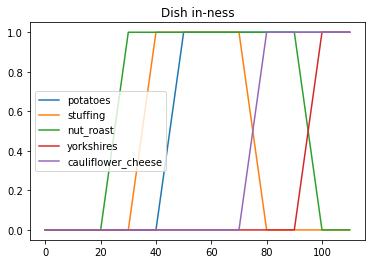

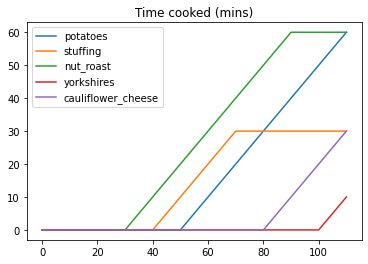

In [4]:
# plot outputs

res = opt.get_results()
is_in = pd.DataFrame({name: res[name]["is_in"] for name in res})
time_cooked = pd.DataFrame({name: res[name]["time_cooked"] for name in res})

is_in.plot()
plt.title("Dish in-ness")

time_cooked.plot()
plt.title("Time cooked (mins)")

In [5]:
opt.print_instructions()

30 minutes: Put in the nut_roast.
40 minutes: Put in the stuffing.
50 minutes: Put in the potatoes.
80 minutes: Take out the stuffing. Put in the cauliflower_cheese.
100 minutes: Take out the nut_roast. Put in the yorkshires.
